In [55]:
import pandas as pd
from os import getcwd, listdir
from os.path import join
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from utils.get_column import GetColumn

In [56]:
data_location = join(getcwd(), "data")
xpt_location = join(data_location, "xpt") 

In [57]:
def xpt_to_df(folder, name_xpt):
    df = pd.read_sas(join(xpt_location, folder, name_xpt))
    return df

In [76]:
df_femur = xpt_to_df('Examination', 'dxxfem_h.xpt')
df_spine = xpt_to_df('Examination', 'dxxspn_h.xpt')

df_femur.shape, df_spine.shape

((3708, 20), (3708, 24))

In [59]:
df_femur.columns

Index(['SEQN', 'DXAFMRST', 'DXXFMBCC', 'DXXOFBMD', 'DXXOFBMC', 'DXXOFA',
       'DXXNKBMD', 'DXXNKBMC', 'DXXNKA', 'DXXTRBMD', 'DXXTRBMC', 'DXXTRA',
       'DXXINBMD', 'DXXINBMC', 'DXXINA', 'DXXWDBMD', 'DXXWDBMC', 'DXXWDA',
       'DXAFMRK', 'DXAFMRD0'],
      dtype='object')

In [60]:
c = GetColumn({
    'id': 'SEQN',
    'femur': 'DXXNKBMD',
    'fscore': 'DXXNK_TSCORE',
    'spine': 'DXXOSBMD',
    'sscore': 'DXXOS_TSCORE',
})

References:
- https://wwwn.cdc.gov/Nchs/Nhanes/2013-2014/DXXFEM_H.htm
- https://wwwn.cdc.gov/Nchs/Nhanes/2013-2014/DXXSPN_H.htm

<Axes: xlabel='DXXNKBMD', ylabel='Count'>

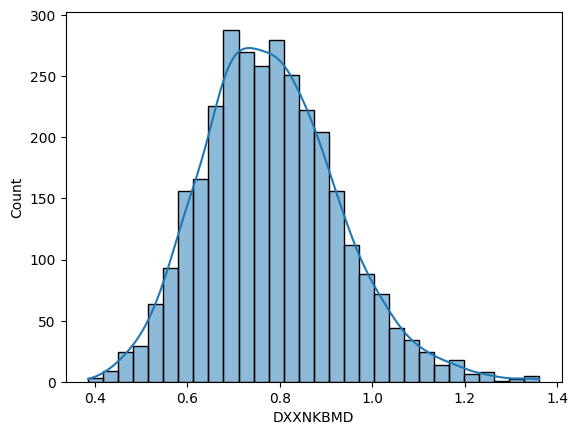

In [61]:
sns.histplot(data=df_femur,x=c['femur'],bins=30,kde=True)#, stat="density")

This is the formula for calculating the T-score based on bone mineral density (BMD) measurements. The T-score represents how much a person's bone density deviates from the mean bone density of a young healthy adult.

$$
T-score = \frac{\text{Patient's BMD} - \text{Mean BMD of young healthy adult}}{\text{Standard Deviation (SD) of BMD of young healthy adult}}
$$

- 0.86 is the mean femoral neck BMD of a young healthy adult.
- 0.12 is the standard deviation of the femoral neck BMD of a young healthy adult.

 The reference values can differ based on the population studied and the anatomical site of the BMD measurement (e.g., spine, hip). It's crucial to use the correct reference values for accurate T-score calculations.

In [62]:
df_femur[c['fscore']]= (df_femur[c['femur']] - 0.858)/0.12
#df_femur['DXXNK_TSCORE']= (df_femur['DXXNKBMD'] - 0.888)/0.121 # Updated reference: https://doi.org/10.1210/clinem/dgab180

<Axes: xlabel='DXXNK_TSCORE', ylabel='Count'>

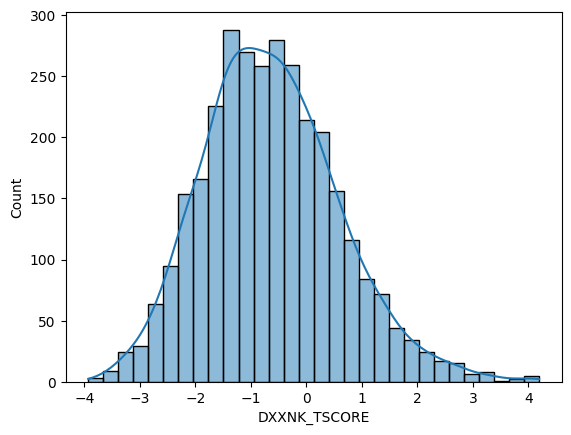

In [63]:
sns.histplot(df_femur[c['fscore']],bins=30,kde=True)

Calculate spine t scores using Hologic white female AP spine reference data

In [64]:
df_spine[c['sscore']]= (df_spine[c['spine']] - 1.047)/0.11
# df_spine['DXXOS_TSCORE']= (df_spine['DXXOSBMD'] - 1.065)/0.122 # Updated reference: https://doi.org/10.1210/clinem/dgab180


Existing reference values (https://doi.org/10.1007/s001980050093): 
- femoral neck BMD mean [SD] = 0.858 g/cm2 [0.120 g/cm2]
- total hip BMD mean [SD] = 0.942 g/cm2 [0.122 g/cm2] 
- lumbar spine BMD mean [SD] = 1.040 g/cm2  [0.110 g/cm2]


Updated reference (https://doi.org/10.1210/clinem/dgab180):
- femoral neck BMD mean [SD] = 0.888 g/cm2 [0.121 g/cm2]
- total hip BMD mean [SD] = 0.963 g/cm2 [0.119 g/cm2] 
- lumbar spine BMD mean [SD] = 1.065 g/cm2  [0.122 g/cm2]

<Axes: xlabel='DXXOS_TSCORE', ylabel='Count'>

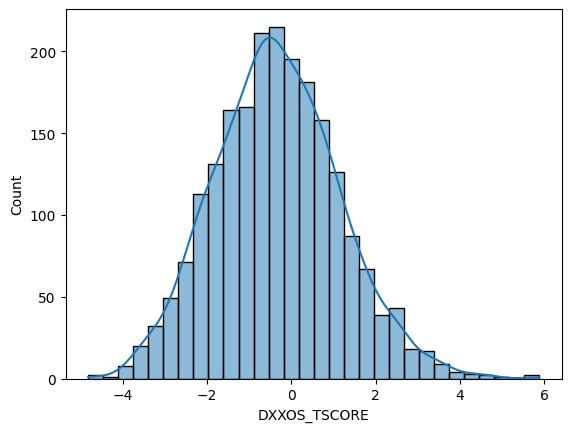

In [65]:
sns.histplot(df_spine[c['sscore']],bins=30,kde=True)

Hologic DXA machines typically use their proprietary reference databases for calculating T-scores. Hologic machines commonly use the following reference populations for T-scores:

1. **White Female Database**: This is one of the most widely used reference databases. It's based on a sample of young, healthy white women, typically aged 20-29. T-scores derived from this database are often used for diagnosing osteoporosis in postmenopausal white women.

2. **White Male Database**: Similarly, Hologic has a reference database for young, healthy white men. It's less commonly used than the female database but is available for appropriate male patient populations.

3. **Other Ethnic Databases**: Hologic also provides databases for other ethnic groups. This includes African American, Asian, and Hispanic databases, among others.

4. **Pediatric Database**: For assessing bone health in children and adolescents, there's a separate pediatric reference database.

The T-score is calculated by comparing the patient's BMD with the average BMD of the young reference population and then dividing by the standard deviation (SD) of the BMD of the young reference population.

The choice of reference database is crucial. The International Society for Clinical Densitometry (ISCD) provides guidelines on which database to use for specific patient populations. For instance, for diagnosing osteoporosis in postmenopausal non-black women, the white female database is typically used regardless of the patient's ethnicity.

When interpreting T-scores, especially for clinical decisions, it's essential to be aware of which reference database was used. Furthermore, guidelines and recommendations can evolve, so it's always a good idea to consult current clinical guidelines and the latest reference manuals provided by Hologic or any DXA machine manufacturer.

**Is the white female database used also for men?**

Yes, the white female database has historically been used as the reference standard for both men and postmenopausal women in clinical practice, especially for the diagnosis of osteoporosis. The rationale is based on the observation that the risk of fracture in men at a given T-score is similar to that in postmenopausal women when the white female database is used as the reference.
https://iscd.org/learn/official-positions/adult-positions/

However, over the years, there has been an increasing awareness of the need for male-specific reference data. Hologic and other DXA machine manufacturers have subsequently developed male-specific reference databases. Yet, for many clinical decisions, especially regarding the diagnosis of osteoporosis, the white female reference database is often still applied to men.

That said, when using DXA results in clinical practice, it's crucial to be aware of which reference database was employed, as this can influence the interpretation of results. The International Society for Clinical Densitometry (ISCD) provides guidelines on which database to use for specific patient populations and situations. Always refer to current clinical guidelines and standards when making diagnostic or treatment decisions based on T-scores.

https://iscd.org/learn/official-positions/adult-positions/
- **The WHO international reference standard for osteoporosis diagnosis is a T-score of -2.5 or less at the femoral neck.**
- **The reference standard from which the T-score is calculated is the female, white, age 20-29 years, NHANES III database.**

Osteoporosis may be diagnosed in postmenopausal women and in men age 50 and older if the T-score of the lumbar spine, total hip, or femoral neck is -2.5 or less:*

*Note: Other hip regions of interest, including Ward’s area and the greater trochanter, should not be used for diagnosis. Application of recommendation may vary according to local requirements.

- **Use a uniform Caucasian (non-race adjusted) female normative database for women of all ethnic groups.**
- **Use a uniform Caucasian (non-race adjusted) female reference for men of all ethnic groups.**
- **Manufacturers should continue to use NHANES III data as the reference standard for femoral neck and total hip T-scores.**

In [66]:
# Function to map values to conditions
def map_to_condition(value):
    if pd.isna(value):  # Check for NaN
        return np.nan
    elif value <= -2.5:
        return 'osteoporosis'
    elif value > -1:
        return 'normal'
    else:
        return 'osteopenia'

# Apply the function to the 'DXXNK_TSCORE' column
df_target = df_femur[c['id', 'fscore']].copy()
df_target['CLASSES'] = df_femur[c['fscore']].apply(map_to_condition)

In [67]:
print(df_target['CLASSES'])

0              NaN
1           normal
2              NaN
3       osteopenia
4           normal
           ...    
3703        normal
3704        normal
3705           NaN
3706        normal
3707        normal
Name: CLASSES, Length: 3708, dtype: object


In [68]:
df_target['CLASSES'].describe()

count       3127
unique         3
top       normal
freq        1841
Name: CLASSES, dtype: object

In [69]:
df_target['CLASSES'].unique()

array([nan, 'normal', 'osteopenia', 'osteoporosis'], dtype=object)

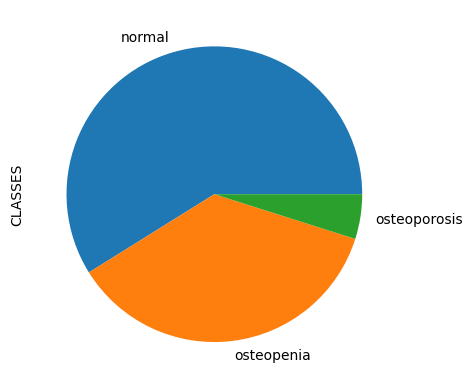

In [70]:
df_target['CLASSES'].value_counts().plot.pie()
plt.show()

In [71]:
def map_to_binary(value):
    if pd.isna(value):  # Check for NaN
        return np.nan
    
    elif value=='osteoporosis':
        return 1
    elif value=='osteopenia':
        return 1
    else:
        return 0

df_target['TARGET_BINARY'] = df_target['CLASSES'].apply(map_to_binary)

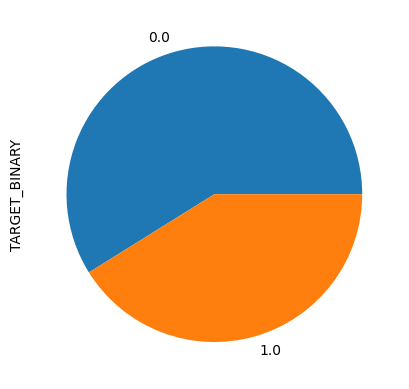

In [72]:
df_target['TARGET_BINARY'].value_counts().plot.pie()
plt.show()

In [73]:
df_target['TARGET_BINARY'].value_counts()

0.0    1841
1.0    1286
Name: TARGET_BINARY, dtype: int64

In [74]:
df_target.to_csv('target.csv', index=False)